In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sklearn kütüphanesini içe aktaralım
from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_csv('Downloads/dogrusal_regresyon_veriseti.csv', sep = ';') # sep(seperator) yani noktali virgülle ayrılıdğı için onu oku varsayılan değer virgül yoksa
df.head()

,deneyim,maas
0,0.5,2500
1,0.0,2250
2,1.0,2750
3,5.0,8000
4,8.0,9000


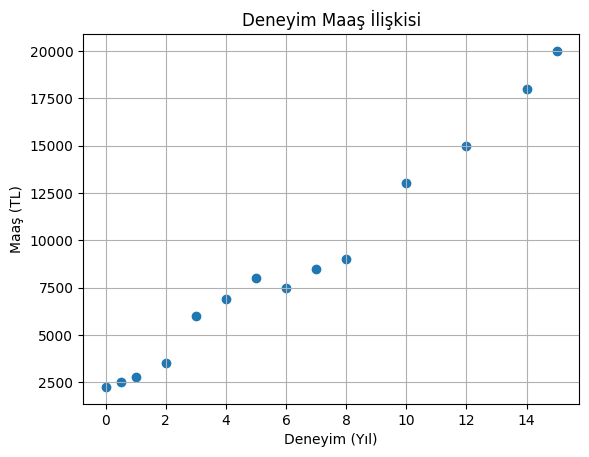

In [5]:
# veriyi görselleştirelim
plt.scatter(df.deneyim, df.maas)
plt.xlabel('Deneyim (Yıl)')
plt.ylabel('Maaş (TL)')
plt.title('Deneyim Maaş İlişkisi')
plt.grid(True)
plt.show()

In [7]:
# Doğrusal Regresyon Modelini Eğitimi

# Doğrusal Regresyon Modeli
linear_reg = LinearRegression()

x = df.deneyim.values.reshape(-1, 1) # .reshape boyut belirleme fonk.
# .reshape ile array olan veriyi -1 yaparak 2 boyutluya çevirdik
# -1 kaç adet varsa sona gideceği için o kadar satır oluşturur
y = df.maas.values.reshape(-1, 1)
# sklearn hemen hemen tüm verileri bu formatta alır
# Örn: .resahpe(n,2) 'ye uygun verilerde nasıl bir oturma süreci göstereceğini araştırınız lütfen.

# Doğrusal Regresiyon eğitimi
linear_reg.fit(x, y)

LinearRegression()

In [10]:
# y = b0 + b1x

# y eksenini kestiği nokta intercept bulunması
y_ekseni_kesisim = np.array([0]).reshape(-1, 1)
b0 = linear_reg.predict(y_ekseni_kesisim)
print('b0: ', b0)

# y ekseninin kestiği nokta (intercept) - alternatif
b0_ = linear_reg.intercept_
print('b0_ : ', b0)

# eğim(slope) bulunması
b1 = linear_reg.coef_
print('b1: ', b1)

b0:  [[1663.89519747]]
b0_ :  [[1663.89519747]]
b1:  [[1138.34819698]]


In [11]:
# maaş = 1663 + 1138 * Deneyim yılı
# y eksenini kestiği nokta ve eğime göre doğrusal modeller oluşturulur

deneyim = 11 # 11 yıllık deneyim

maas_yeni = 1663 + 1138 * deneyim
# sklearn genelde paramatereleri array olarak ister

# 11 yıllık deneyime sahip birinin maaş predict metodu ile tahmin edilir
sonuc = linear_reg.predict(np.array([deneyim]).reshape(1, -1))
# predict fonk. array bekler o yüzden arayle verdik
# predict'te tek bir arrayde olması gerektiği için ve sklearn parametreleri array olarak aldığı için 1, -1 olması gerekiyor
print("11 yıllık deneyime sahip birinin maaşı: {} TL".format(sonuc[0]))

11 yıllık deneyime sahip birinin maaşı: [14185.72536421] TL


### **Basit Doğrusal Regresiyon Modelinde Test / Tahmin / Görselleştirme**

● Geçen bölümde eğitimini gerçekleştirdiğimiz basit doğrusal regresiyon modelimizi kullanarak tehminler yapacağız ve sonuçları görselleştireceğiz.

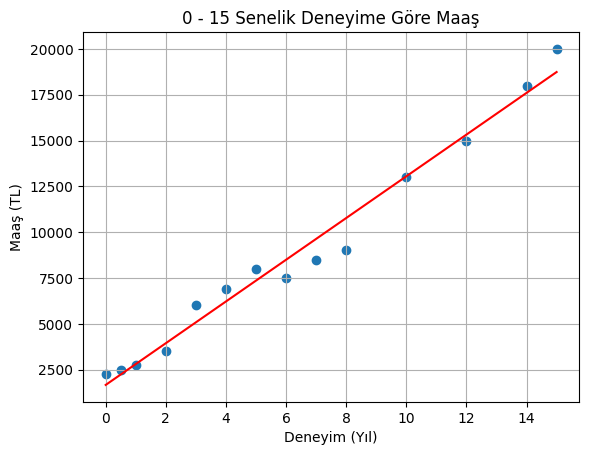

In [13]:
# Doğrusal Regresyon Modeli ile Test / Tahmin / Görselleştirme

array = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]).reshape(-1,1)

plt.figure()
plt.scatter(x, y)

# 0 - 15 yılların arasında deneyime sahip olan insanların maaşı tahmin edilir
y_head = linear_reg.predict(array)

plt.plot(array, y_head, color = 'r') # (deneyim, maaş)
plt.xlabel('Deneyim (Yıl)')
plt.ylabel('Maaş (TL)')
plt.title('0 - 15 Senelik Deneyime Göre Maaş')
plt.grid(True)
plt.show()